In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.widgets as widgets
from IPython.display import display

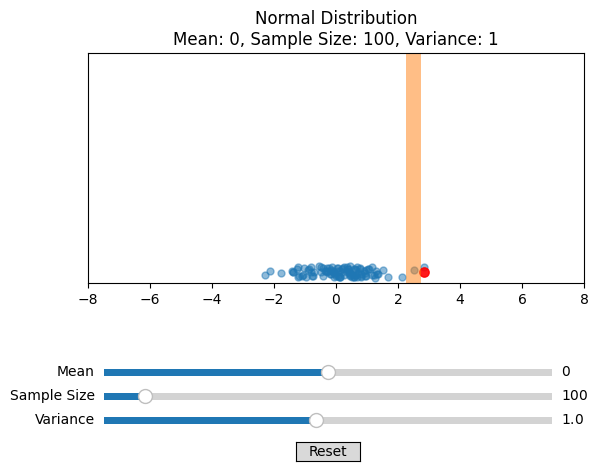

In [5]:

# Initialize the figure and axes
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.4)  # Adjust the bottom margin for the slider bars

# Set the initial parameters
mean = 0
sample_size = 100
variance = 1

# Create the slider bars
ax_mean = plt.axes([0.15, 0.2, 0.7, 0.03])  # Slider for mean
ax_sample = plt.axes([0.15, 0.15, 0.7, 0.03])  # Slider for sample size
ax_variance = plt.axes([0.15, 0.1, 0.7, 0.03])  # Slider for speed
slider_mean = widgets.Slider(ax_mean, 'Mean', -8, 8, valinit=mean)
slider_sample = widgets.Slider(ax_sample, 'Sample Size', 10, 1000, valinit=sample_size)
slider_variance = widgets.Slider(ax_variance, 'Variance', 0.1, 2, valinit=variance)

# Create the histogram
maxes = []
hists, bins = np.histogram(maxes, bins=40, range=(-10, 10))

# Function to update the plot
def update(num_points):
    ax.clear()
    ax.set_xlim(-8, 8)
    ax.set_ylim(0, 2)
    ax.get_yaxis().set_visible(False)

    mean = slider_mean.val
    sample_size = int(slider_sample.val)
    variance = slider_variance.val

    ax.set_title(
        f'Normal Distribution\nMean: {mean}, Sample Size: {sample_size}, Variance: {variance}')

    points = np.random.normal(mean, variance, sample_size)
    rando_heights = np.random.uniform(0.05, 0.15, sample_size)
    ax.scatter(points, rando_heights, s=25, alpha=0.5)
    ax.scatter([max(points)], [0.1], s=45, c='red', alpha=0.9)

    # Accumulate maximum points in the histogram
    maxes.append(max(points))
    hists, bins = np.histogram(maxes, bins=40,
                               range=(-10, 10), density=True)
    ax.bar(bins[:-1], hists, width=0.5, alpha=0.5)

    ax.figure.canvas.draw()

# Reset the histogram
def reset_histogram(event):
    """Reset the histogram"""
    global maxes
    maxes = []
    ax.clear()
    ax.set_xlim(-10, 10)
    ax.set_ylim(0, 2.5)
    ax.get_yaxis().set_visible(False)
    ax.set_title(
        f'Normal Distribution\nMean: {mean}, Sample Size: {sample_size}, Variance: {variance}')
    ax.figure.canvas.draw()

# Update the plot when sliders are changed
slider_mean.on_changed(update)
slider_sample.on_changed(reset_histogram)
slider_variance.on_changed(update)

# Create the reset button
reset_ax = plt.axes([0.45, 0.03, 0.1, 0.04])
reset_button = widgets.Button(reset_ax, 'Reset', hovercolor='0.975')
reset_button.on_clicked(reset_histogram)

# Create the animation
ani = animation.FuncAnimation(fig, update,
                              frames=10, interval=500)


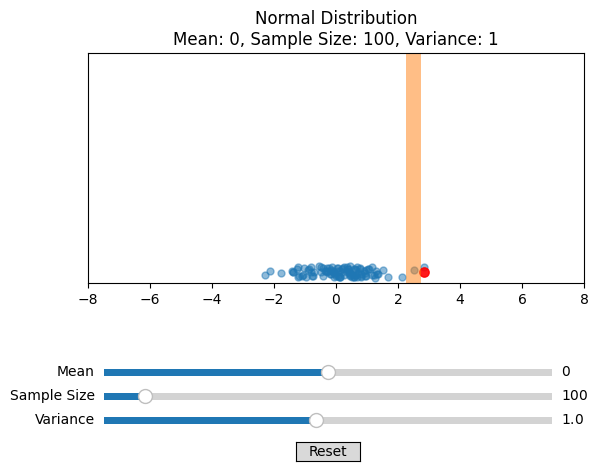

In [6]:
display(fig)